In [17]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [18]:
df = pd.read_csv('../data/model_3_data.csv',sep=';')
print(len(df))
df.head()

850


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,339.998 kr.,2020,93000,2019-03-04,El,75.1,498,A,2630
1,385.900 kr.,2021,13000,2022-01-27,El,77.8,325,A,9440
2,419.500 kr.,2021,48000,2021-01-11,El,66.9,513,A,7700
3,448.800 kr.,2021,15500,2021-09-23,El,75.1,498,A,2670
4,449.800 kr.,2022,10000,2022-03-17,El,75.1,498,A,6400


In [19]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,339998,2020,93000,2019,El,75.1,498,A,2630
1,385900,2021,13000,2022,El,77.8,325,A,9440
2,419500,2021,48000,2021,El,66.9,513,A,7700
3,448800,2021,15500,2021,El,75.1,498,A,2670
4,449800,2022,10000,2022,El,75.1,498,A,6400
...,...,...,...,...,...,...,...,...,...
845,299000,2021,32000,2021,El,77.8,325,A,5230
846,444900,2021,11000,2021,El,75.1,476,A,9430
847,449800,2021,9000,2022,El,66.9,513,A,6580
848,418500,2021,14062,2021,El,66.9,513,A,6330


In [20]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [21]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [22]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.762298835105778


In [23]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 361537.31kr - actual price: 352000kr
Car 2: Predicted price: 419607.39kr - actual price: 415000kr
Car 3: Predicted price: 358273.84kr - actual price: 329700kr
Car 4: Predicted price: 419190.43kr - actual price: 434500kr
Car 5: Predicted price: 424195.92kr - actual price: 429900kr


In [24]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [25]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

95.17801342238755

<h2> Decision tree regressor

In [26]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.5947210522059747

In [27]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 339800.0kr - actual price: 352000kr
Car 2: Predicted price: 398225.0kr - actual price: 415000kr
Car 3: Predicted price: 347200.0kr - actual price: 329700kr
Car 4: Predicted price: 394960.0kr - actual price: 434500kr
Car 5: Predicted price: 424900.0kr - actual price: 429900kr


In [28]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

94.27238014189895

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code
price,1.000000,0.435113,-0.471682,0.421185,-0.211662,0.638514,0.093792
model_year,0.435113,1.000000,-0.724778,0.944330,0.373736,-0.120060,0.126465
km,-0.471682,-0.724778,1.000000,-0.741349,-0.360963,0.100157,-0.133291
reg,0.421185,0.944330,-0.741349,1.000000,0.384138,-0.159791,0.156833
fuel_economy,-0.211662,0.373736,-0.360963,0.384138,1.000000,-0.565408,0.010756
horse_power,0.638514,-0.120060,0.100157,-0.159791,-0.565408,1.000000,-0.049891
zip_code,0.093792,0.126465,-0.133291,0.156833,0.010756,-0.049891,1.000000


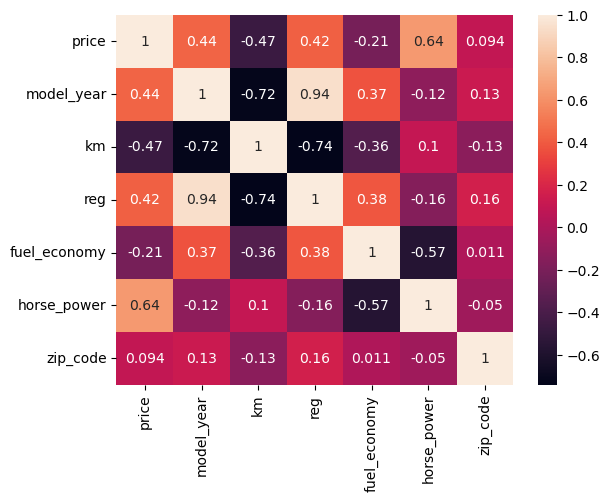

In [29]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

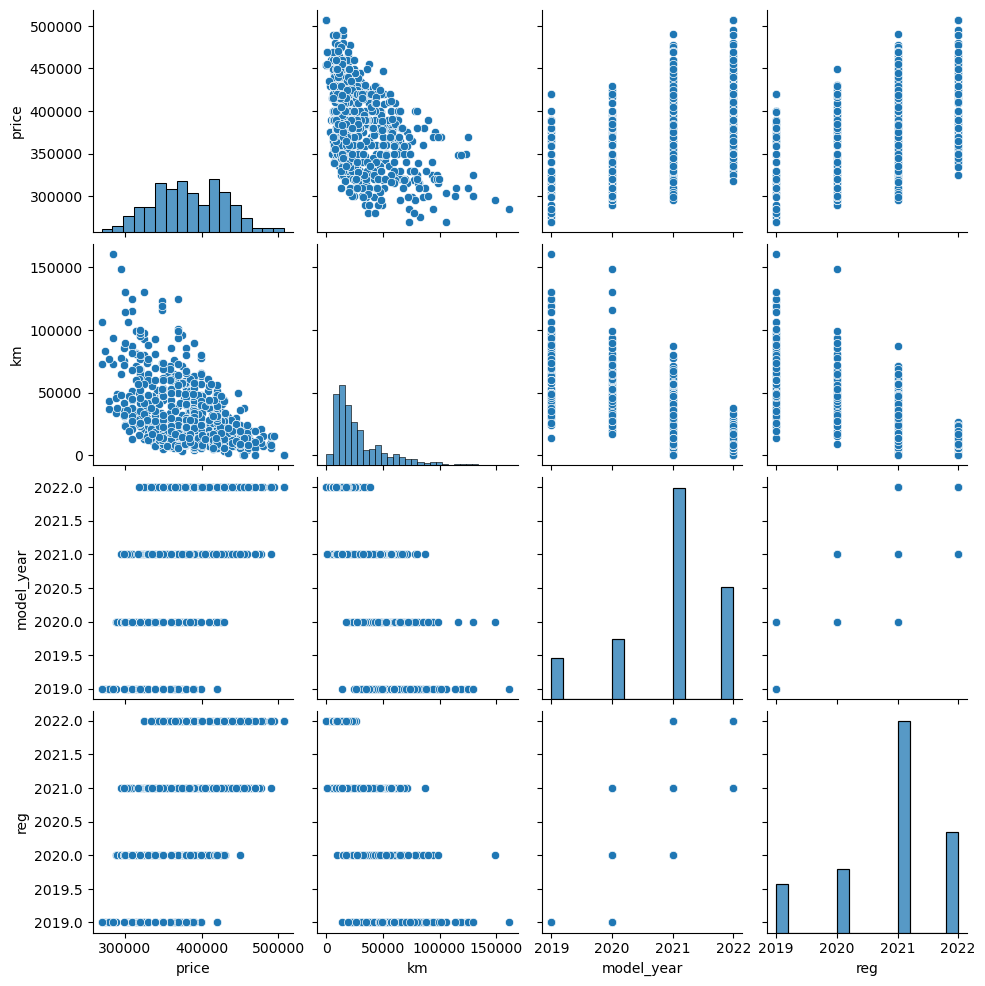

In [30]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

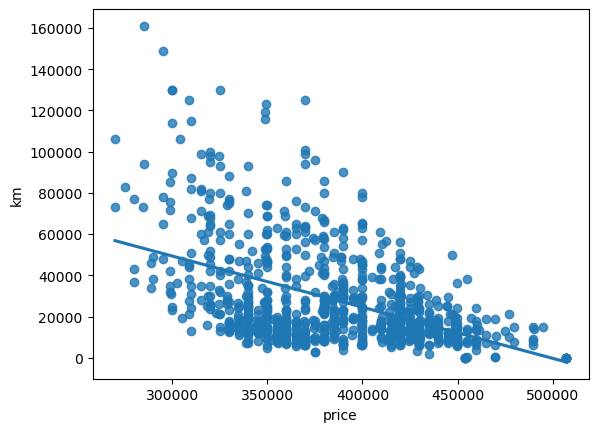

In [31]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

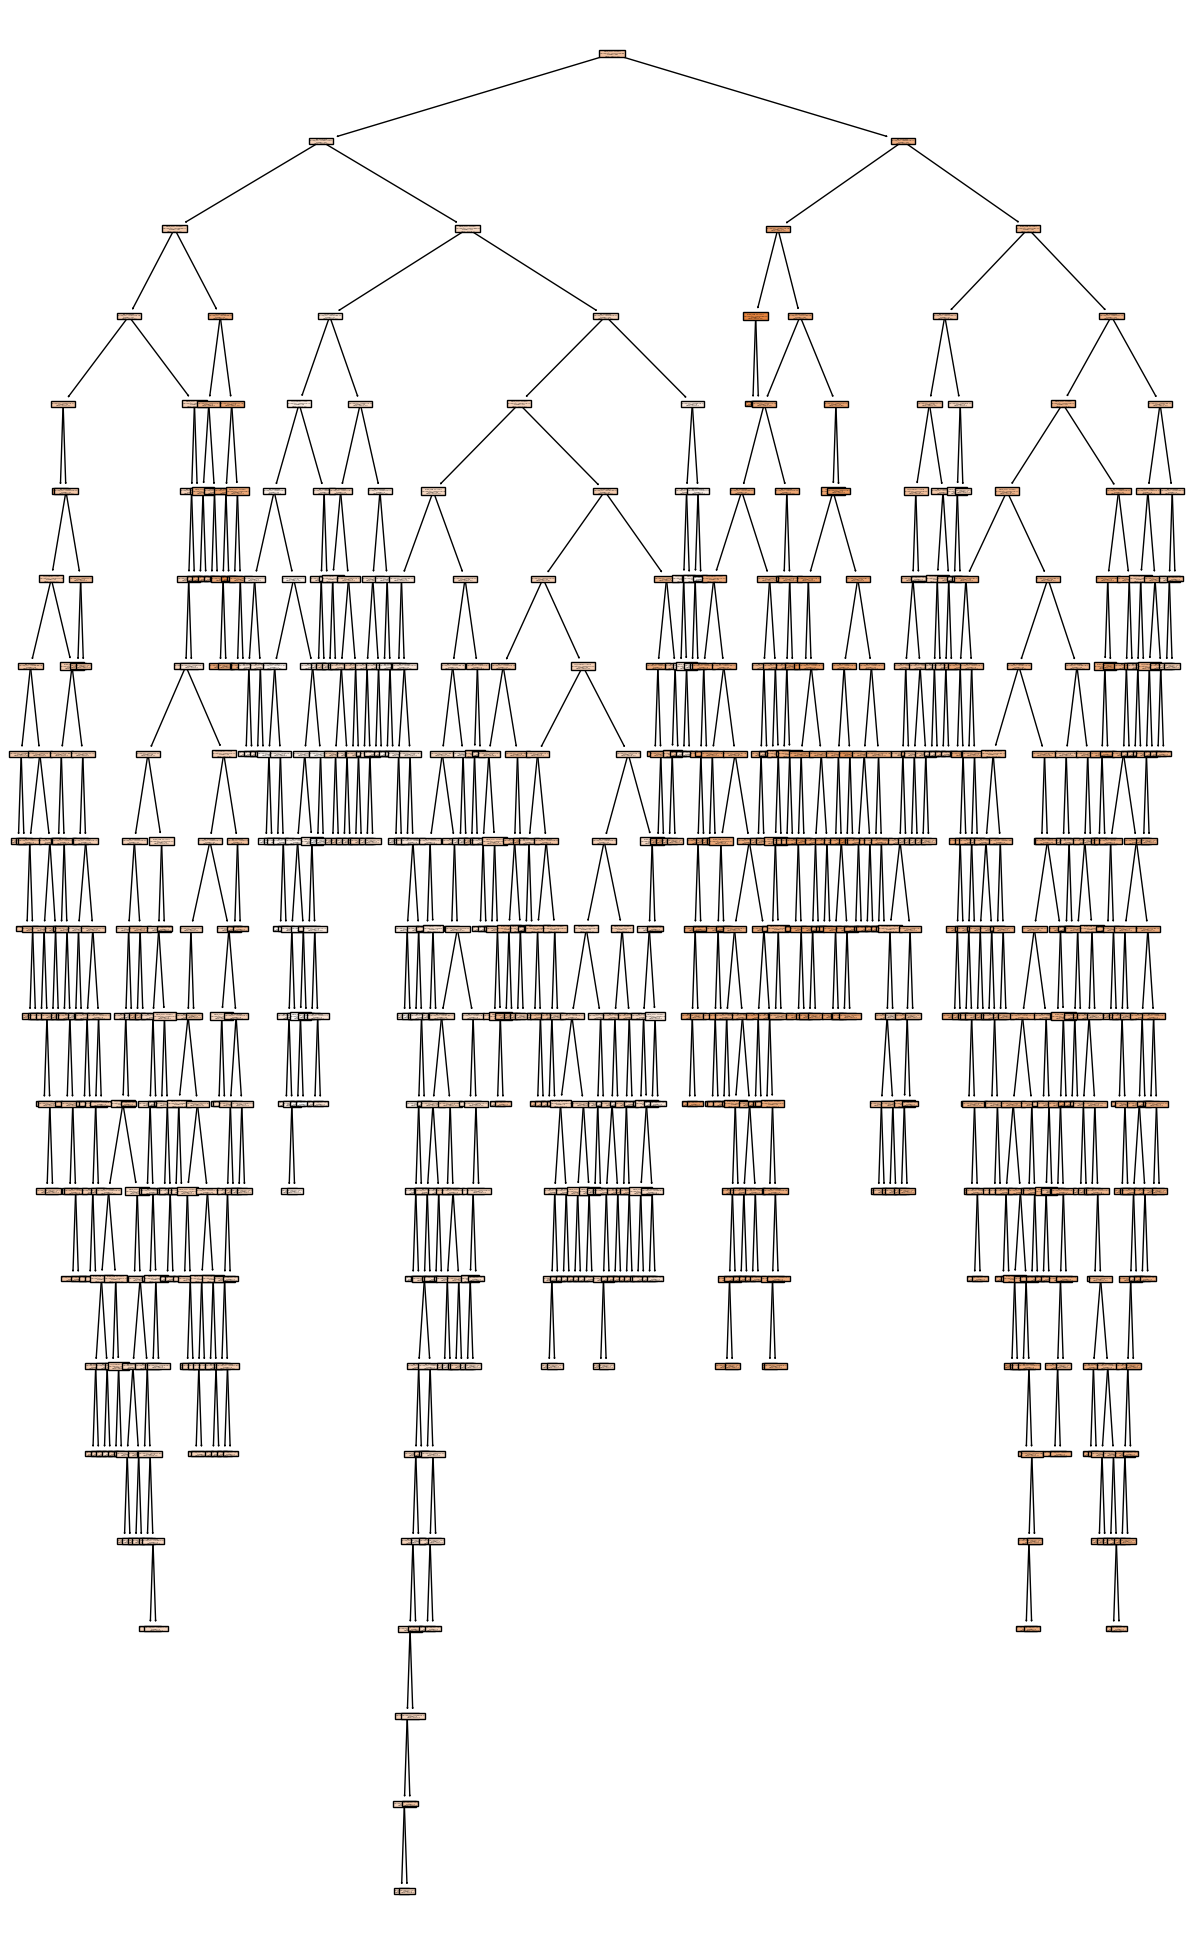

In [32]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)